In [29]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd                  
import numpy as np                   
import random                        
from collections import Counter      
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

In [30]:
train = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_test.csv')

In [31]:
train.shape
train.info()
train.describe()

test.info()

(891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
train_count_of_missval_by_col = (train.isnull().sum())
train_count_of_missval_by_col

train_count_of_missval_by_col[train_count_of_missval_by_col > 0]

(train_count_of_missval_by_col[train_count_of_missval_by_col > 0]/train.shape[0])*100

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age         177
Cabin       687
Embarked      2
dtype: int64

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [33]:
test_count_of_missval_by_col = (test.isnull().sum())
test_count_of_missval_by_col

test_count_of_missval_by_col[test_count_of_missval_by_col > 0]

(test_count_of_missval_by_col[test_count_of_missval_by_col > 0]/test.shape[0])*100

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age       86
Fare       1
Cabin    327
dtype: int64

Age      20.574163
Fare      0.239234
Cabin    78.229665
dtype: float64

In [34]:
train['Survived'] = train['Survived'].astype(str)
train['Pclass'] = train['Pclass'].astype(str)

test['Pclass'] = test['Pclass'].astype(str)

In [35]:
del train['Name']
del train['PassengerId']
del train['Ticket']
del train['Cabin']

del test['Name']
del test['PassengerId']
del test['Ticket']
del test['Cabin']

train.shape
test.shape

(891, 8)

(418, 7)

In [36]:
train = train[train['Fare'] != 0]
train.shape

(876, 8)

In [37]:
from sklearn.impute import SimpleImputer 

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(train[['Age']])
train['Age'] = mean_imputer.transform(train[['Age']]).ravel()

mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
mode_imputer = mode_imputer.fit(train[['Embarked']])
train['Embarked'] = mode_imputer.transform(train[['Embarked']]).ravel()

In [38]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imputer = mean_imputer.fit(test[['Age']])
test['Age'] = mean_imputer.transform(test[['Age']]).ravel()

In [39]:
test = test[test['Fare']>0]
test.shape

(415, 7)

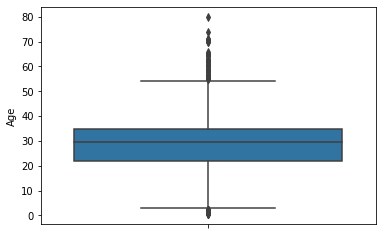

In [40]:
sns.boxplot(y='Age', data = train, whis=1.5)

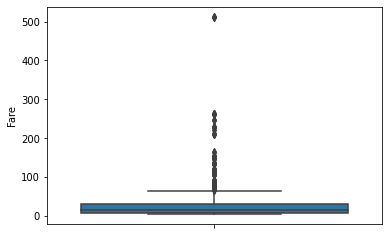

In [41]:
sns.boxplot(y='Fare', data = train, whis=1.5)

In [42]:
q1 = train['Age'].quantile(0.25)                 
q3 = train['Age'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5

outlier_age_train = train[(train['Age'] < q1 - whisker_width*iqr) | (train['Age'] > q3 + whisker_width*iqr)]
outlier_age_train.shape

(66, 8)

In [43]:
q1 = train['Fare'].quantile(0.25)                 
q3 = train['Fare'].quantile(0.75)
iqr = q3 - q1
whisker_width = 1.5
lower_whisker = q1 - whisker_width*iqr
upper_whisker = q3 + whisker_width*iqr

outlier_fare_train = train[(train['Fare'] < q1 - whisker_width*iqr) | (train['Fare'] > q3 + whisker_width*iqr)]
outlier_fare_train.shape

(116, 8)

In [44]:
train.info()
test.info()

train = pd.get_dummies(train, columns=['Pclass'])
train = pd.get_dummies(train, columns=['Sex'])
train = pd.get_dummies(train, columns=['Embarked'])

test = pd.get_dummies(test, columns=['Pclass'])
test = pd.get_dummies(test, columns=['Sex'])
test = pd.get_dummies(test, columns=['Embarked'])

train.shape
test.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  876 non-null    object 
 1   Pclass    876 non-null    object 
 2   Sex       876 non-null    object 
 3   Age       876 non-null    float64
 4   SibSp     876 non-null    int64  
 5   Parch     876 non-null    int64  
 6   Fare      876 non-null    float64
 7   Embarked  876 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 61.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    415 non-null    object 
 1   Sex       415 non-null    object 
 2   Age       415 non-null    float64
 3   SibSp     415 non-null    int64  
 4   Parch     415 non-null    int64  
 5   Fare      415 non-null    float64
 6   Embarked  415 non-null

(876, 13)

(415, 12)

In [45]:
X_train = train.drop('Survived',axis=1)
Y_train = train['Survived']

X_train.shape
Y_train.shape

(876, 12)

(876,)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier(random_state=1)

In [48]:
dtree.fit(X_train, Y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [49]:
predictions_train = dtree.predict(X_train)
predictions_test = dtree.predict(test)

In [51]:
from sklearn.metrics import accuracy_score
print('Training accuracy...', accuracy_score(Y_train, predictions_train))
#print('Test accuracy', accuracy_score(y_test, predictions_test))

Training accuracy... 0.9817351598173516


In [52]:
from sklearn.tree import export_graphviz
import graphviz

In [54]:
dot_data= export_graphviz(dtree, out_file=None, 
                    feature_names=test.columns,  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)

In [55]:
graph1=graphviz.Source(dot_data)

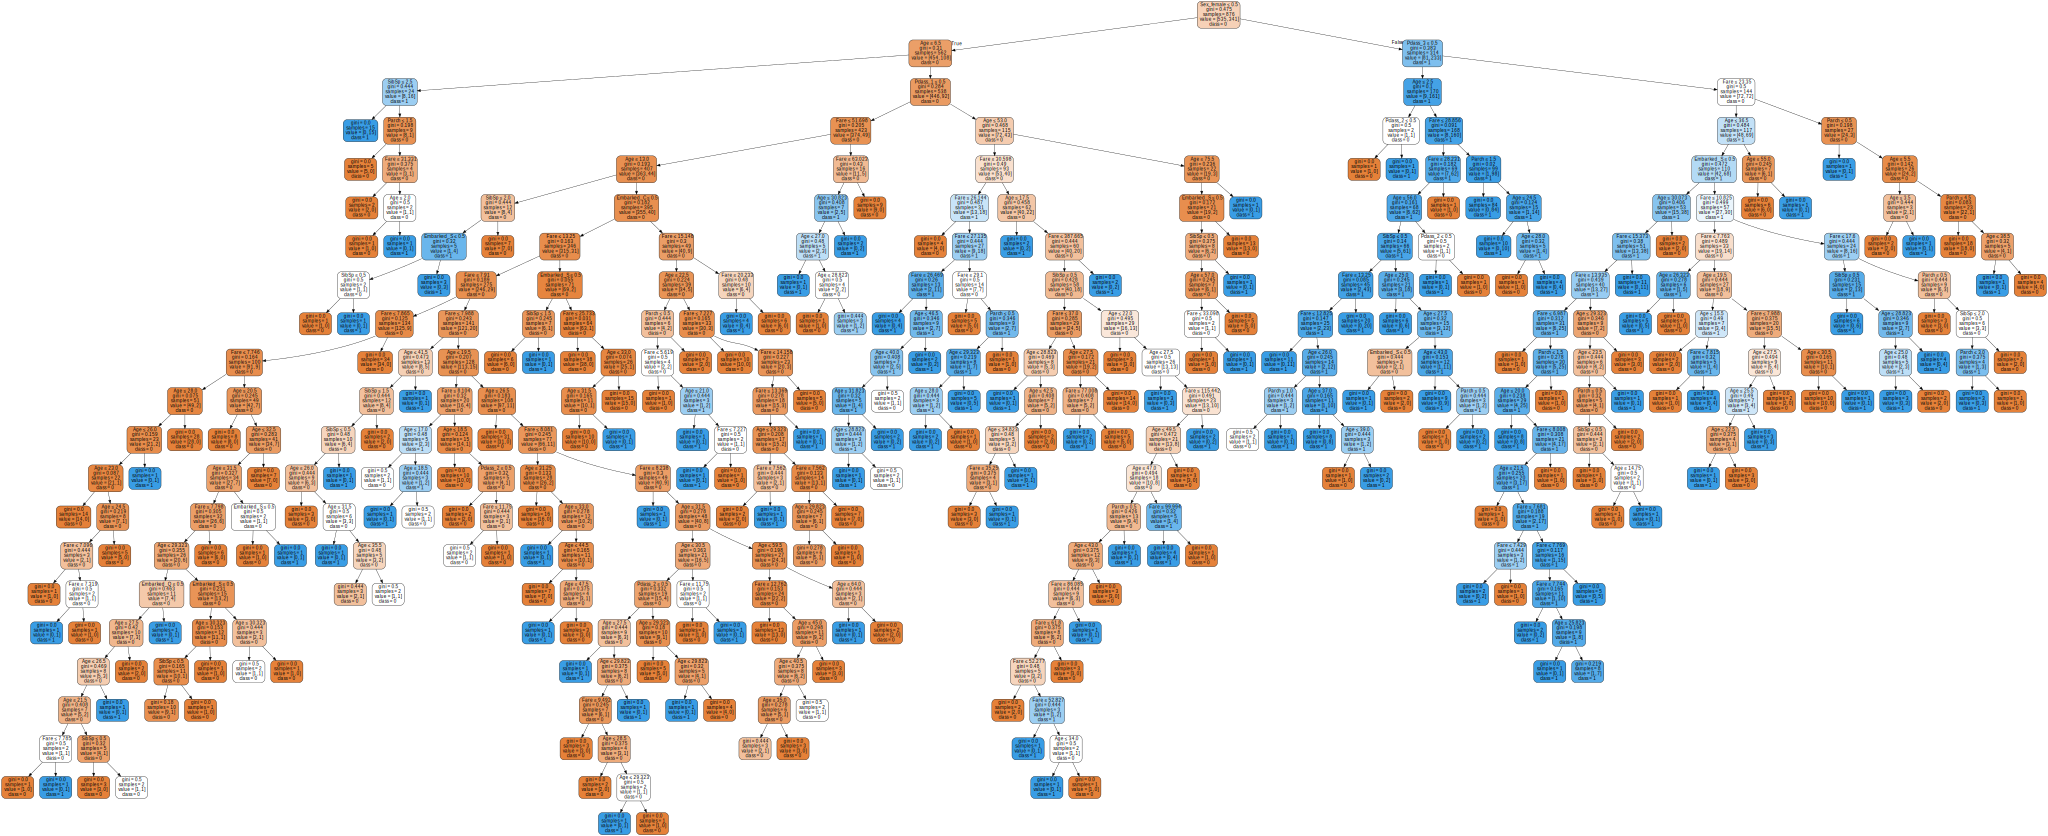

In [56]:
graph1